# **Description of work:**

The objective of this project is to identify distinct customer segments, understand customer behavior and provide recommendations to the marketing team to develop targeted marketing strategies. The data includes basic information about customers such as their ID, age, gender, annual income, and spending score.  <br> <br>
Initially we will perform some descriptive analysis for basic data understanding. Then we will try to figure out some patterns or relationships in our data with bivariate data analysis.<br>  

And finally we will implement the **K-Means clustering** ML algorithm with the **Elbow method** using the scikit-learn library in Python. The algorithm is widely used for a variety of tasks, such as image segmentation, customer segmentation and anomaly detection.<br> <br>
By understanding the customers behavior better, the mall can plan their marketing strategy accordingly and focus their campaigns to the particular customers groups.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("C:/Users/User/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().value_counts()

False    200
dtype: int64

For futher data exploring we don't need CustomerID column

In [7]:
df=df.drop('CustomerID', axis=1)

# Univariate analysis

Univariate analysis is a basic kind of analysis technique for statistical data.
The main objective of the univariate analysis is to describe the data in order to find 
out the patterns in the data. This is done by looking at descriptive data such as mean, mode, median, standard deviation, etc.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [8]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

Let's display Gender distribution

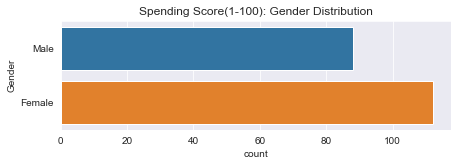

In [10]:
plt.figure(figsize = (7 , 2))
sns.countplot(y = 'Gender' , data = df)
plt.title('Spending Score(1-100): Gender Distribution')
plt.show();


Here I will use sns.distplot(), is a function that is used to plot a univariate distribution of observations. It combines a histogram of the distribution with a kernel density estimate (KDE) plot, allowing you to visualize the shape of the distribution and its density.  

Right after  I am going to explore the distribution of the same parameters but with gender separation.

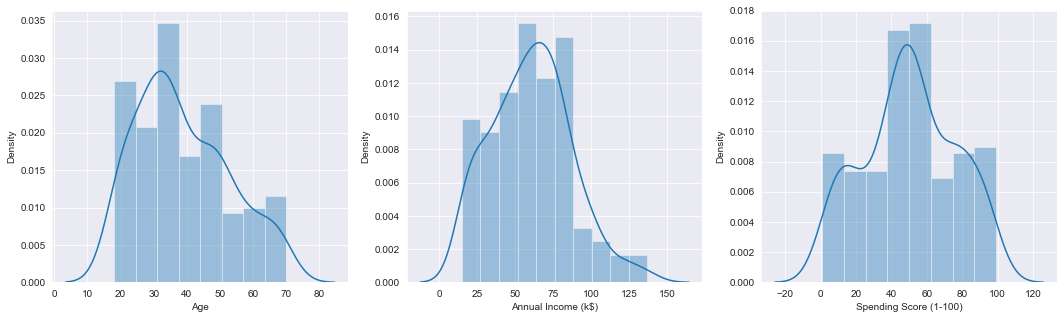

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize = (18 , 5))
n = 0
for i in columns:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.2)
    sns.distplot(df[i])

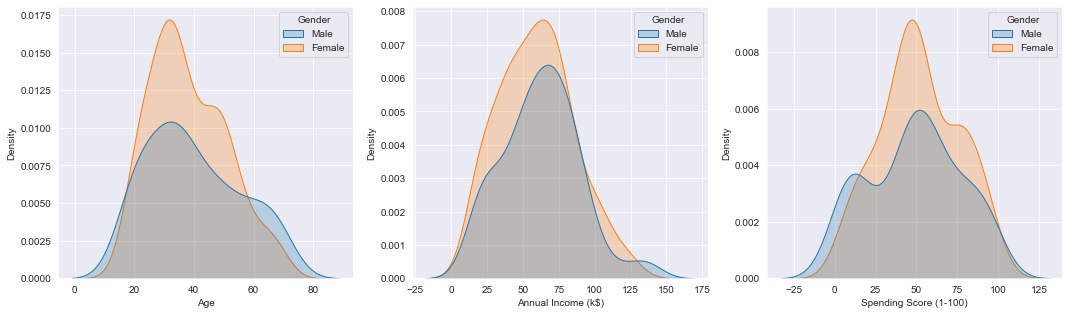

In [11]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize = (18, 5))
n = 0
for i in columns:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.2)
    sns.kdeplot(df[i], shade=True, hue=df['Gender'])

Few more boxplots for comprehensive understanding of Gender distribution

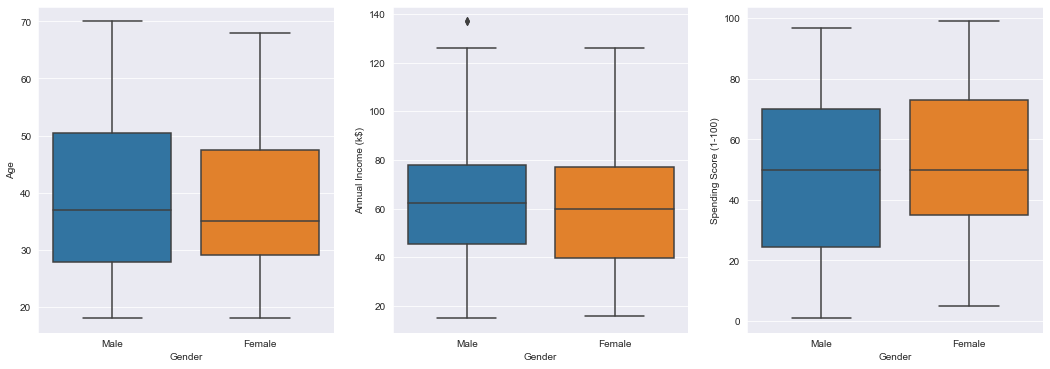

In [12]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize = (18 , 6))
n = 0
for i in columns:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.2)
    sns.boxplot(data=df, x='Gender', y=df[i])

# Bivariate Analysis

Bivariate analysis means the analysis of the bivariate data. This is a single statistical analysis that is used to find out the relationship that exists between two value sets. 

 For starters we will use sns.pairplot() to create a grid of scatter plots.

 The resulting plot shows scatter plots of each variable against every other variable 
 and histograms of each variable along the diagonal. This can be useful for quickly identifying patterns
 or relationships in our data.

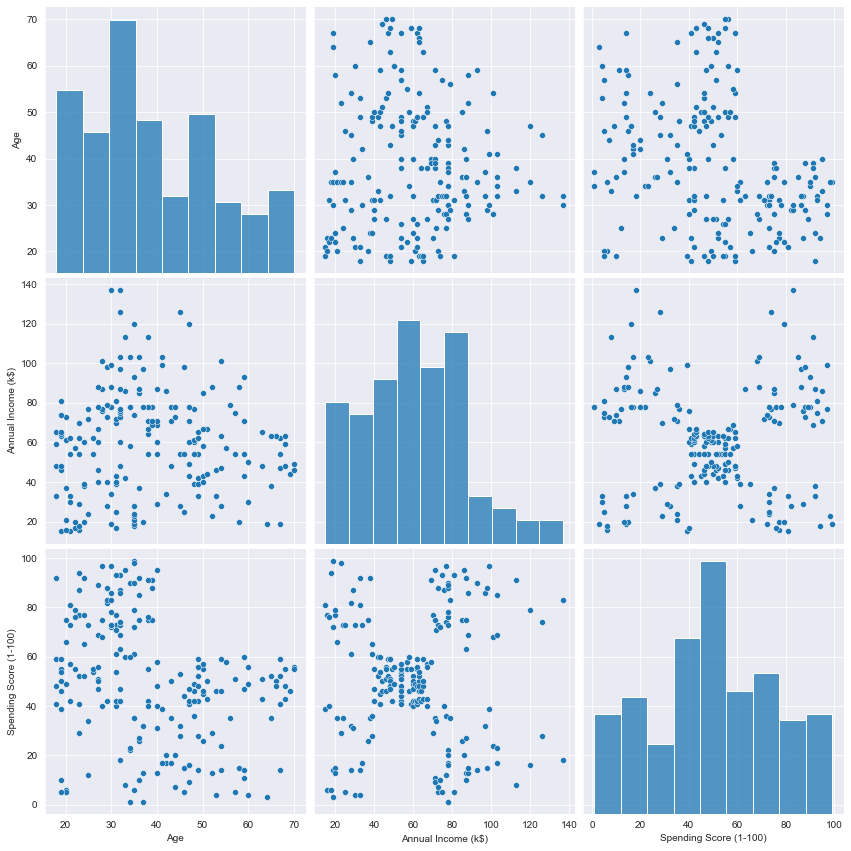

In [13]:
sns.pairplot(df, palette='dark', height = 4)

Upon reviewing the pairplot, we are able visually identify certain clusters of annual income and spending score. However, aside from those clusters, we do not observe any other substantial patterns or relationships.


Let's analyze this dependence in more detail

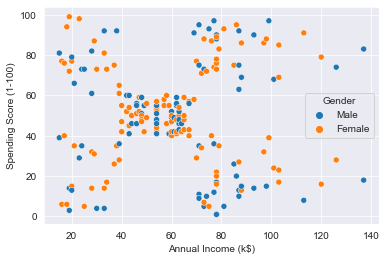

In [14]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender');

In [14]:
df.groupby('Gender')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


### What are the correlations between the spending score, age, and income?

In [16]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

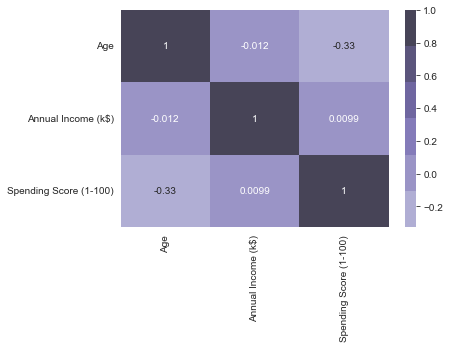

In [17]:
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette('Purples_d')) 


### Observation:

From the summary above, we can see the Pearson coefficients between different variables. We don't see strong linear correlation between the age, income, and the spending score.
However, we can use unsupervised clustering algorithm like K-mean to cluster the customer into different segments.



## K Means Clustering Using the Elbow Method

On this stage we are going to implement KMeans segmentation with Elbow method to identify ideal number of clusters.

 In the Elbow method, we are actually varying the number of clusters (K) from 1 – 10. For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters.<br>
 
 
 
 The main idea is to minimize the distance (e.g., euclidean distance) between the data points and the centroid of the clusters. The process is iterated until we reach a minimum value for the sum of distances.

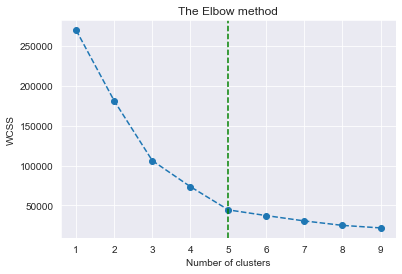

In [23]:
WCSS = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    WCSS.append(kmeans.inertia_)
    
number_clusters = range(1,10)
plt.plot(number_clusters, WCSS, 'o--')    
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(5, color='g', linestyle='--', label='perfect');


This method shows that 5 is a appropriate number of clusters.

 Let's make one more column with corresponding clusters

In [44]:
clustering = KMeans(n_clusters=5)
clustering.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering.labels_ + 1
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
0,Male,19,15,39,5
1,Male,21,15,81,1
2,Female,20,16,6,5
3,Female,23,16,77,1
4,Female,31,17,40,5


 Next step will be plotting our clusters and their centroids

In [45]:
centers = pd.DataFrame(clustering.cluster_centers_)
centers.columns = ['x', 'y']

Text(0.5, 1.0, 'Clusters')

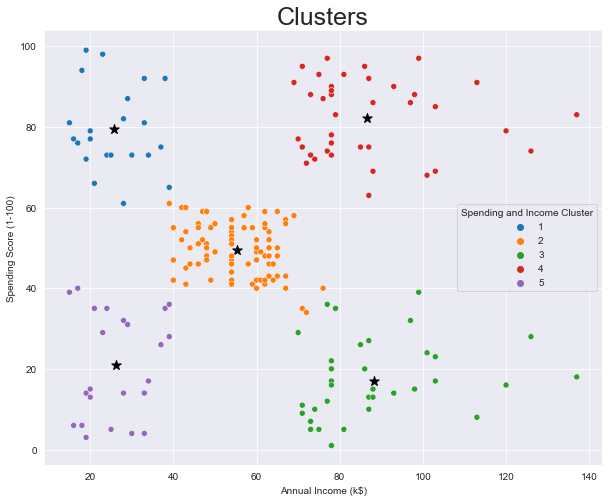

In [46]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*' )
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', \
                hue='Spending and Income Cluster', palette='tab10')
plt.title('Clusters', fontsize=25)
# plt.savefig('clustering_bivariate.png')

 Let's look on the gender distribution in clusters

In [47]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
1,0.590909,0.409091
2,0.592593,0.407407
3,0.457143,0.542857
4,0.538462,0.461538
5,0.608696,0.391304


Now we can compare clusters in terms of Age, Income and corresponding Spending Score. And then visualise it.


In [48]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
1,25.272727,25.727273,79.363636
2,42.716049,55.296296,49.518519
3,41.114286,88.200000,17.114286
4,32.692308,86.538462,82.128205
5,45.217391,26.304348,20.913043


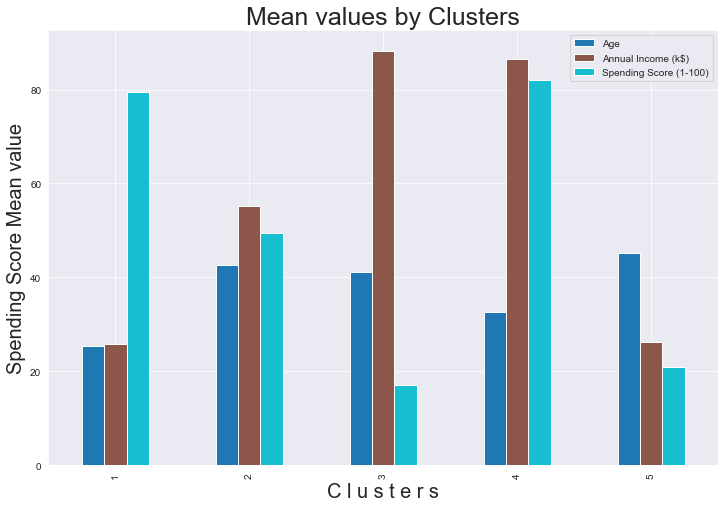

In [49]:
df_grouped = df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

df_grouped.plot(figsize=(12,8), kind='bar', colormap='tab10')
plt.title('Mean values by Clusters', fontsize=25)
plt.xlabel('C l u s t e r s',fontsize=20)
plt.ylabel('Spending Score Mean value', fontsize=20)
plt.show()

# Interpreting the results of a study and summarizing the findings:


As one of the main purposes of this project was a clustering of the customers, so we have made segmentation by implementing ML technique(KMeans Clustering). As result we have identified marketing groups from a large population, it can help us better understand customer behavior and purchasing data in a supermarket mall. 


During the study the following clusters were identified: <br> <br>

* `Cluster 1`: Low Income, High Spending Score <br> <br>
* `Cluster 2`: Average Income, Average Spending Score <br> <br>
* `Cluster 3`: High Income, Low Spending Score <br> <br>
* `Cluster 4`: High Income, High Spending Score <br> <br>
* `Cluster 5`: Low Income, Low Spending Score <br> <br>

Based on the provided information, marketing team can build data-driven strategy and conduct personalized targeting. Leveraging these insights, the mall can now deliver tailored experiences, relevant offers, and effective communication that resonate with each customer segment.
